In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [2]:
df=pd.read_csv('fundamentals.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [4]:
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [5]:
df.dtypes

Unnamed: 0                        int64
Ticker Symbol                    object
Period Ending                    object
Accounts Payable                float64
Accounts Receivable             float64
                                 ...   
Total Revenue                   float64
Treasury Stock                  float64
For Year                        float64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
Length: 79, dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [8]:
#Missing values
def display_missing_perc(df):    
    for col in df.columns.tolist():          
        print(f'{col} column missing values: {100*(df[col].isnull().sum()/len(df[col]))}')
    print('\n')
display_missing_perc(df)

Unnamed: 0 column missing values: 0.0
Ticker Symbol column missing values: 0.0
Period Ending column missing values: 0.0
Accounts Payable column missing values: 0.0
Accounts Receivable column missing values: 0.0
Add'l income/expense items column missing values: 0.0
After Tax ROE column missing values: 0.0
Capital Expenditures column missing values: 0.0
Capital Surplus column missing values: 0.0
Cash Ratio column missing values: 16.78832116788321
Cash and Cash Equivalents column missing values: 0.0
Changes in Inventories column missing values: 0.0
Common Stocks column missing values: 0.0
Cost of Revenue column missing values: 0.0
Current Ratio column missing values: 16.78832116788321
Deferred Asset Charges column missing values: 0.0
Deferred Liability Charges column missing values: 0.0
Depreciation column missing values: 0.0
Earnings Before Interest and Tax column missing values: 0.0
Earnings Before Tax column missing values: 0.0
Effect of Exchange Rate column missing values: 0.0
Equity 

In [9]:
#dropping NA values
df = df.dropna()

In [ ]:
# Checking again for missing values
def display_missing_perc(df):    
    for col in df.columns.tolist():          
        print(f'{col} column missing values: {100*(df[col].isnull().sum()/len(df[col]))}')
    print('\n')
display_missing_perc(df)

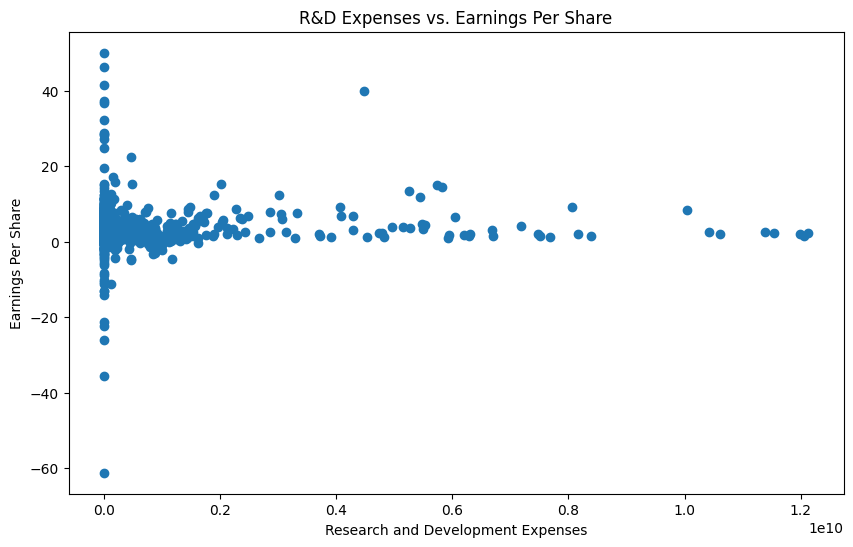

In [17]:

# Dropping specified columns
columns_to_drop = ['Ticker Symbol', 'Unnamed: 0', 'Period Ending','Estimated Shares Outstanding' ]
df_modified = df.drop(columns=columns_to_drop)
#scatterplots
# Scatter plot for R&D expenses vs. Earnings Per Share
plt.figure(figsize=(10, 6))
plt.scatter(df_modified['Research and Development'], df_modified['Earnings Per Share'])
plt.xlabel('Research and Development Expenses')
plt.ylabel('Earnings Per Share')
plt.title('R&D Expenses vs. Earnings Per Share')
plt.show()


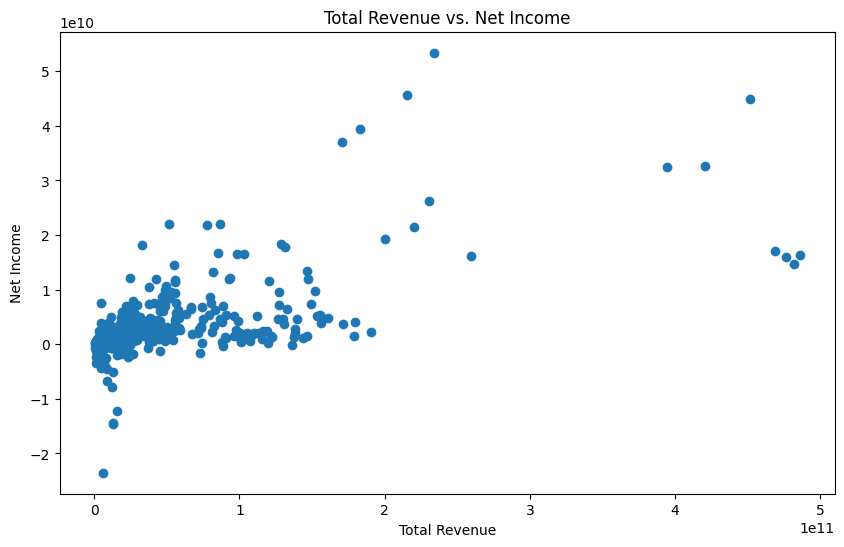

In [16]:
# Scatter plot for Total Revenue vs. Net Income
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Revenue'], df['Net Income'])
plt.xlabel('Total Revenue')
plt.ylabel('Net Income')
plt.title('Total Revenue vs. Net Income')
plt.show()

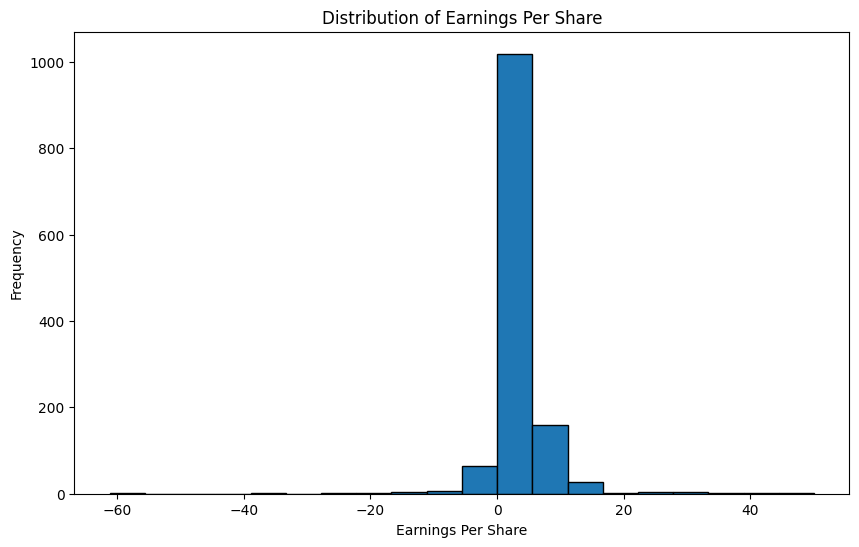

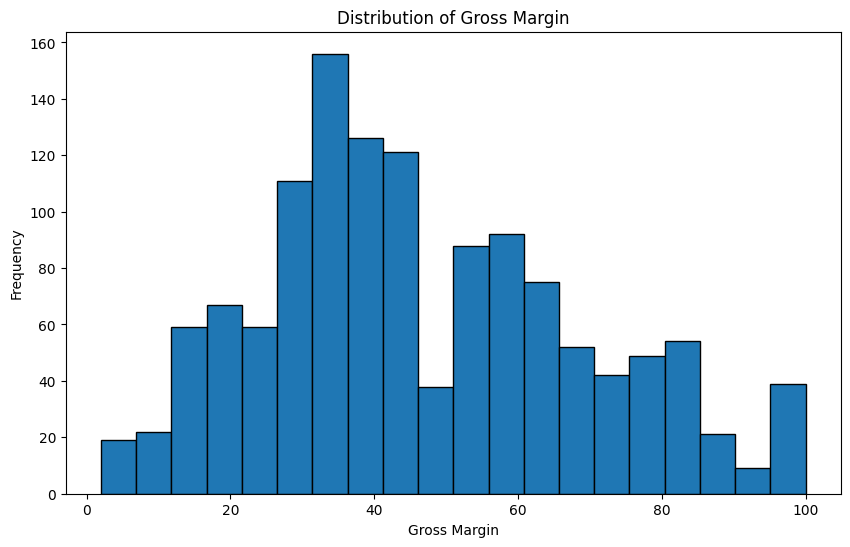

In [18]:
#Histograms
# Histogram for Earnings Per Share
plt.figure(figsize=(10, 6))
plt.hist(df['Earnings Per Share'], bins=20, edgecolor='black')
plt.xlabel('Earnings Per Share')
plt.ylabel('Frequency')
plt.title('Distribution of Earnings Per Share')
plt.show()


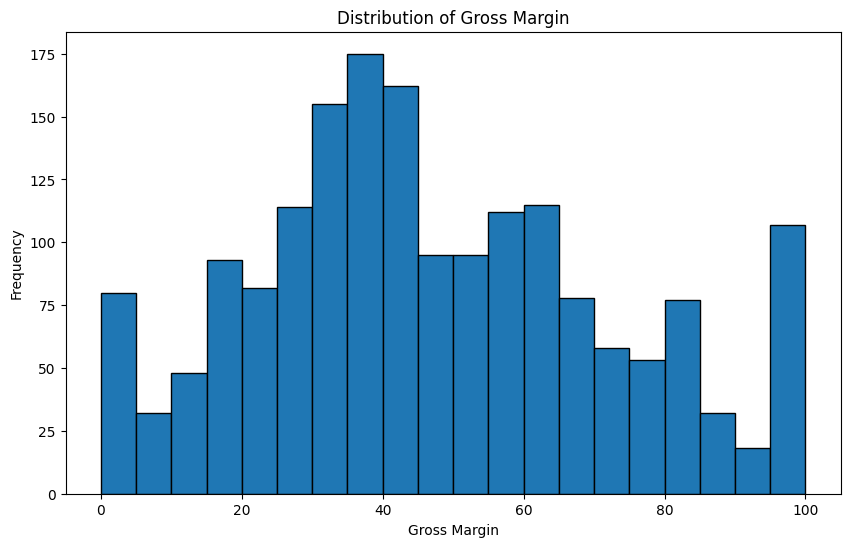

In [6]:
# Histogram for Gross Margin
plt.figure(figsize=(10, 6))
plt.hist(df['Gross Margin'], bins=20, edgecolor='black')
plt.xlabel('Gross Margin')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Margin')
plt.show()

In [ ]:

"""
    R&D Expenses vs. EPS:    
   No clear linear relationship.
   R&D spending alone doesn't predict EPS.

    Total Revenue vs. Net Income:    
   Revenue increase doesn't guarantee proportional Net Income.
   Some companies have losses despite high revenue.

    EPS Distribution:    
   Majority of companies have low EPS.
   Few high  performing companies with high EPS.
   Outliers on both ends.

    Gross Margin Distribution:    
   Multimodal with peaks around 30 to 40.
   Varies among companies or products
"""

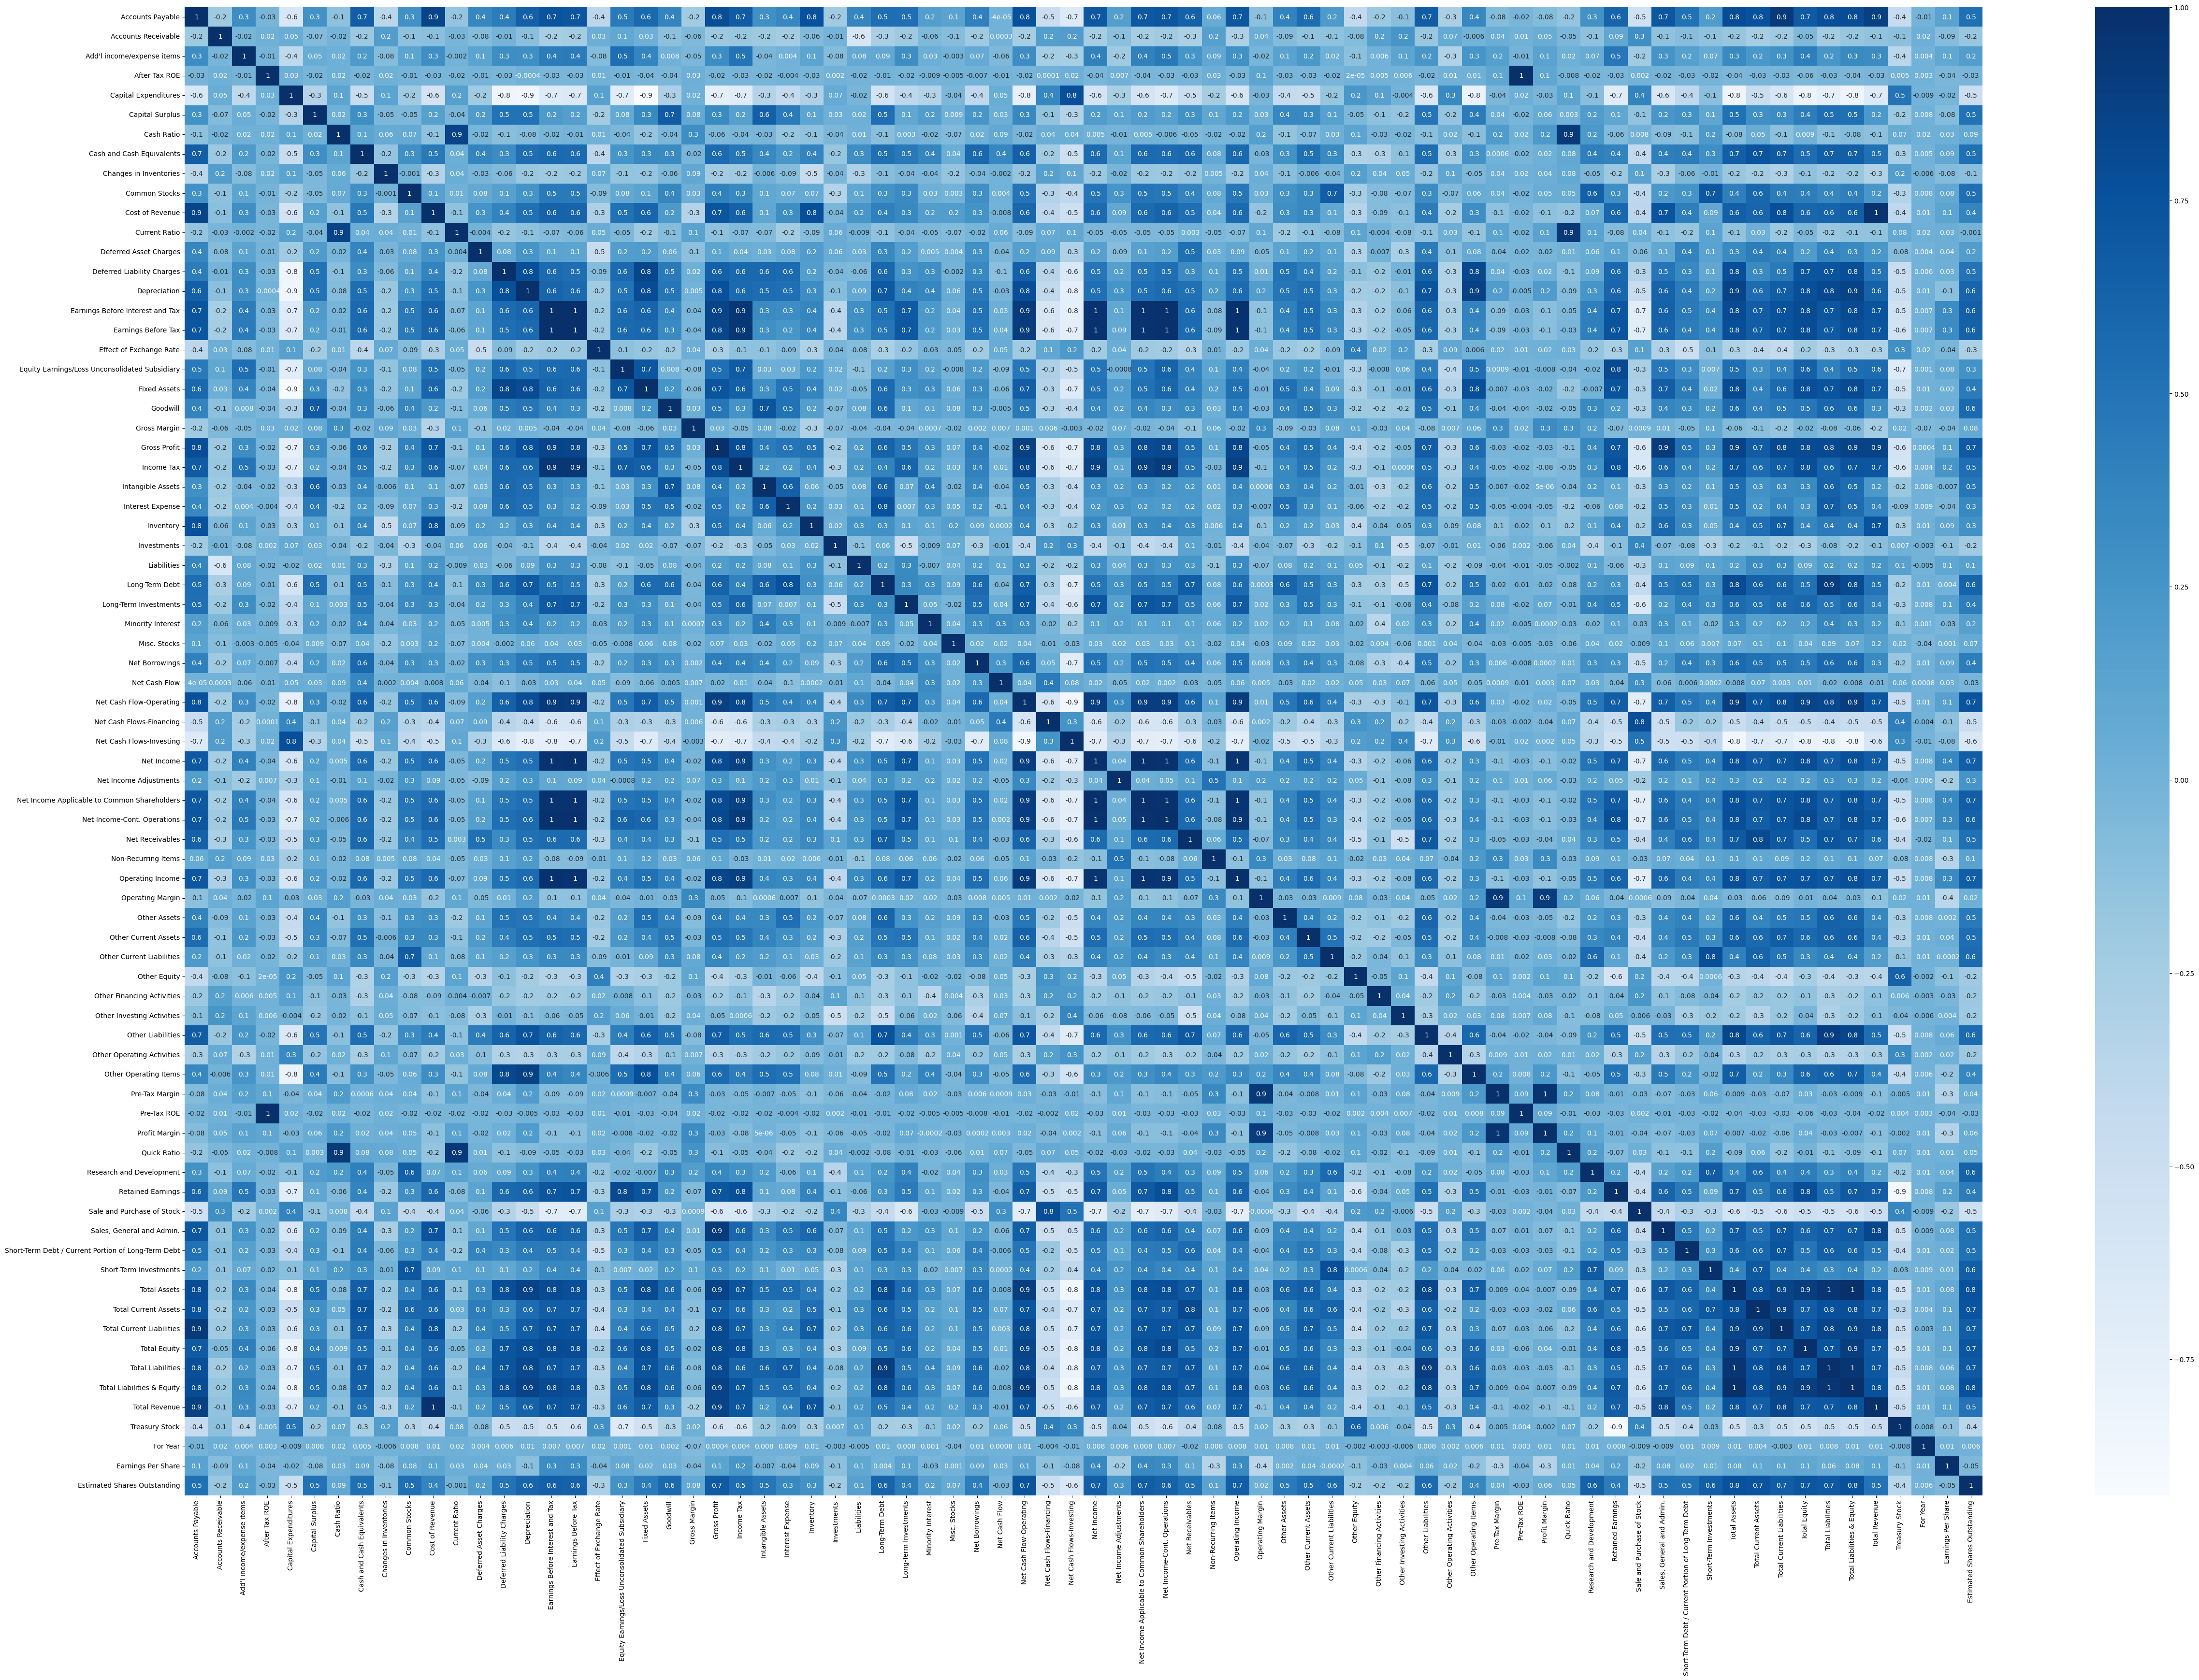

In [23]:
cor=df_modified.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

In [26]:

x = sm.add_constant(df_modified)
y = df['Estimated Shares Outstanding']

model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                                  00:42:40   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025   

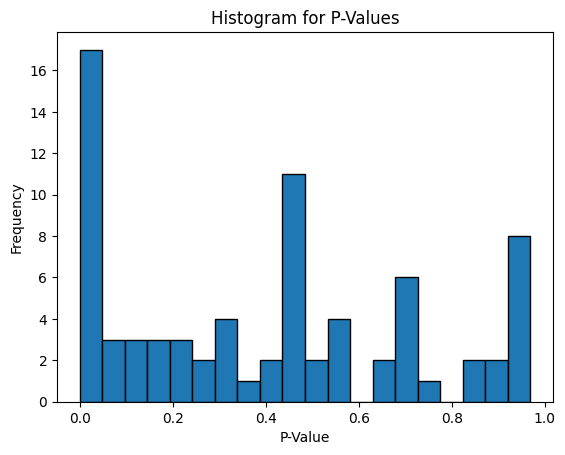

In [28]:

plt.hist(model.pvalues, bins=20, edgecolor='black')
plt.title('Histogram for P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.show()

In [48]:
pvals = model.pvalues
def fdr(pvals, q, plotit=False):
    # Remove NA values
    pvals = np.array(pvals)
    pvals = pvals[~np.isnan(pvals)]
    N = len(pvals)
    # Sort the p-values and calculate the FDR threshold
    sorted_pvals = np.sort(pvals)
    k = np.arange(1, N+1)
    fdr_threshold = (q * k) / N
    # Find the last p-value that is below the FDR threshold
    below_threshold = sorted_pvals <= fdr_threshold
    max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
    alpha = sorted_pvals[max_index]
    print(f"Alpha: {alpha}")
    if plotit:
             plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
    # Calculate the number of true discoveries
    true_discoveries = sorted_pvals[sorted_pvals <= alpha]
    num_of_true_discoveries = len(true_discoveries)
    return num_of_true_discoveries, alpha
    
     

    
    
    

Alpha: 0.001686631337479228


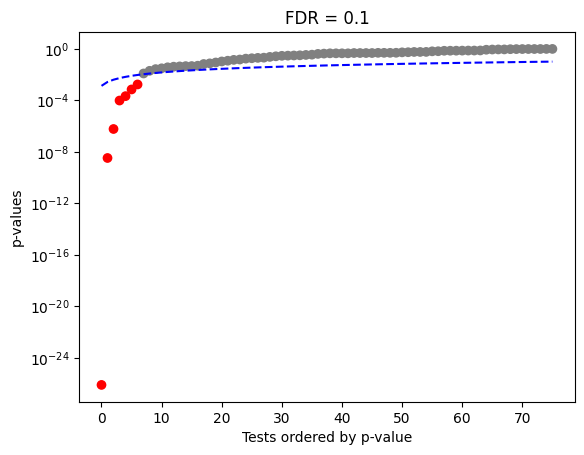

No. of true discoveries: 7


In [49]:
num_of_true_discoveries, alpha = fdr(model.pvalues, 0.1, plotit=True)
print(f"No. of true discoveries: {num_of_true_discoveries}")

Alpha: 0.001686631337479228


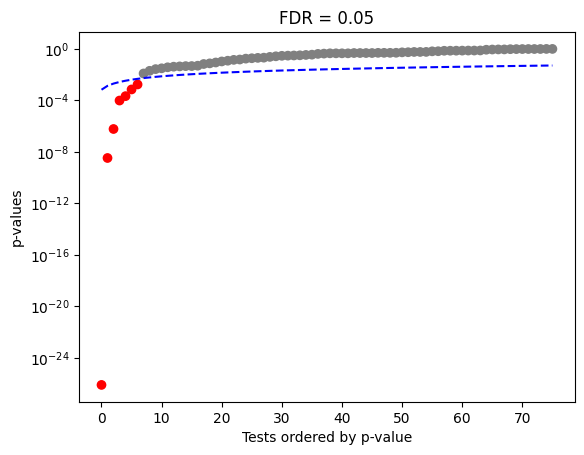

Alpha: 0.001686631337479228


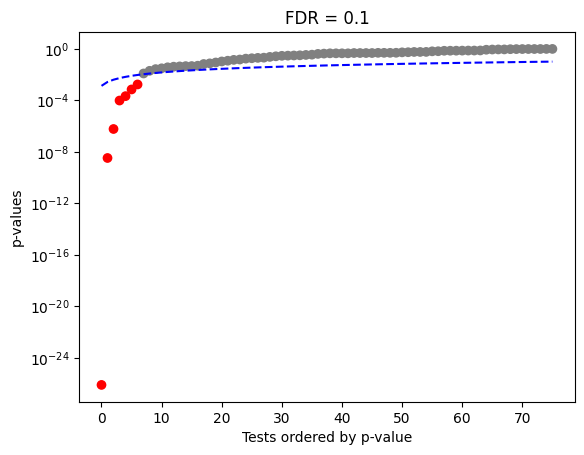

Alpha: 0.012009465808974997


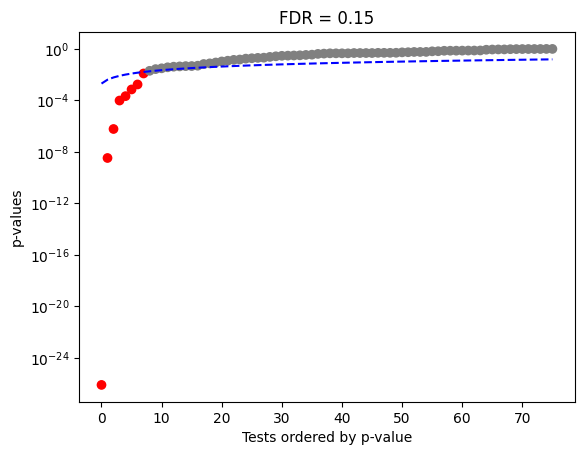

Alpha: 0.026230280820006037


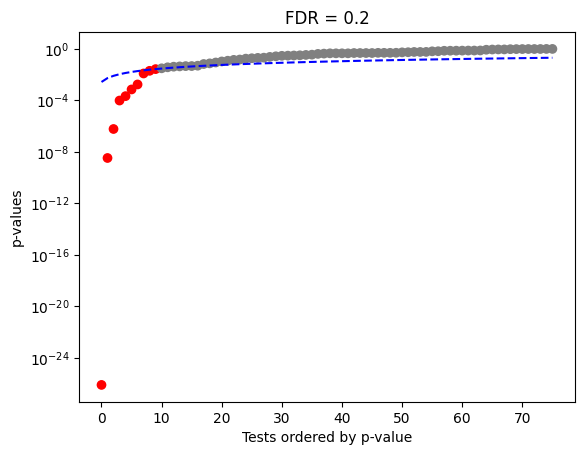

Alpha: 0.04826867981680562


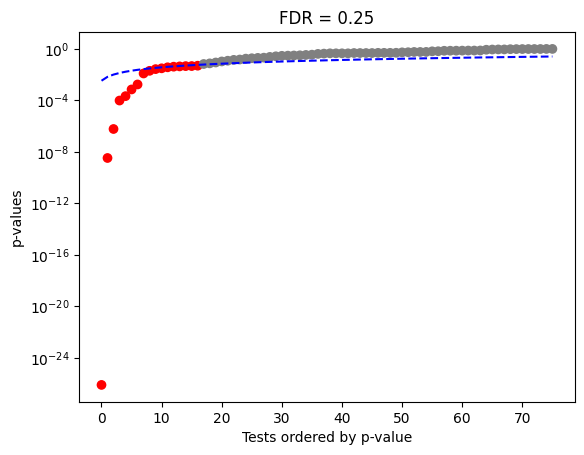

When q= 0.05 
The alpha is: 0.001686631337479228 
The estimated number of true discovery is: 7
When q= 0.1 
The alpha is: 0.001686631337479228 
The estimated number of true discovery is: 7
When q= 0.15 
The alpha is: 0.012009465808974997 
The estimated number of true discovery is: 8
When q= 0.2 
The alpha is: 0.026230280820006037 
The estimated number of true discovery is: 10
When q= 0.25 
The alpha is: 0.04826867981680562 
The estimated number of true discovery is: 17


In [53]:
q_values = [0.05, 0.1, 0.15, 0.2, 0.25]

# Placeholder for results
results = []

for q in q_values:
    num_true_discoveries, alpha = fdr(model.pvalues, q, plotit=True)
    results.append((q, num_true_discoveries, alpha))

# Print out the results
for result in results:
    q, num_true_discoveries, alpha = result
    print(f"When q= {q} \n"
          f"The alpha is: {alpha} \n"
          f"The estimated number of true discovery is: {num_true_discoveries}")


In [ ]:
"""Here the estimated number of true discoveries grows as the q-value increases, particularly within the 0.05 to 0.10 range. A "drastic increase" is noted at a q-value of 0.2. the number of true discoveries jumps to 5 at a q-value of 0.15 and remains constant at 5 for higher q-values of 0.2 and 0.25. This suggests stability in the number of true discoveries once the q-value reaches 0.15 or above """

In [58]:
variables = [
    'Accounts Payable',
    'Accounts Receivable',
    'Add\'l income/expense items',
    'After Tax ROE',
    'Capital Expenditures',
    'Capital Surplus',
    'Cash Ratio',
    'Cash and Cash Equivalents',
    'Changes in Inventories',
    'Common Stocks',
    'Cost of Revenue',
    'Current Ratio',
    'Deferred Asset Charges',
    'Deferred Liability Charges',
    'Depreciation',
    'Earnings Before Interest and Tax',
    'Earnings Before Tax',
    'Effect of Exchange Rate',
    'Equity Earnings/Loss Unconsolidated Subsidiary',
    'Fixed Assets',
    'Goodwill',
    'Gross Margin',
    'Gross Profit',
    'Income Tax',
    'Intangible Assets'
]

df_modified2 = df[variables]
df_modified2.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5.496000e+09,4.616000e+09,0.0,0.0,2.751000e+10,4.091000e+09,73.0,2.989400e+10,-2.994000e+09,2.249000e+09
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,6.579150e+08,6.240740e+08,0.0,0.0,1.292547e+09,7.638900e+07,50.0,3.098036e+09,2.364040e+08,2.884500e+07


In [68]:
#  degree=2 for interaction terms
polynomial_fea = PolynomialFeatures(degree=2, include_bias=False)

# fit and transform the data to create the interaction terms
interaction_fit = polynomial_fea.fit_transform(df_modified2)


# feature names for the columns from the Polynomial Features
interaction_features= polynomial_fea.get_feature_names_out(df_modified2.columns)

# interaction terms into DataFrame
interactions_df = pd.DataFrame(interaction_fit, columns=interaction_features)
interactions_df


,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Gross Margin^2,Gross Margin Gross Profit,Gross Margin Income Tax,Gross Margin Intangible Assets,Gross Profit^2,Gross Profit Income Tax,Gross Profit Intangible Assets,Income Tax^2,Income Tax Intangible Assets,Intangible Assets^2
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,3364.0,8.326480e+11,-3.300200e+10,5.040200e+10,2.060947e+20,-8.168564e+18,1.247536e+19,3.237610e+17,-4.944610e+17,7.551610e+17
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,3481.0,9.277160e+11,-2.041400e+10,1.363490e+11,2.472442e+20,-5.440504e+18,3.633816e+19,1.197160e+17,-7.996060e+17,5.340721e+18
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,3969.0,1.702890e+12,2.079000e+10,1.411200e+11,7.306209e+20,8.919900e+18,6.054720e+19,1.089000e+17,7.392000e+17,5.017600e+18
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5329.0,2.182262e+12,-2.185620e+11,1.641770e+11,8.936512e+20,-8.950264e+19,6.723161e+19,8.964036e+18,-6.733506e+18,5.058001e+18
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,2500.0,1.549018e+11,1.182020e+10,1.442250e+09,9.597827e+18,7.323881e+17,8.936285e+16,5.588685e+16,6.819073e+15,8.320340e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,2.255000e+08,-40400000.0,-3.480000e+07,11.0,-3.423000e+08,4.330700e+09,166.0,1.083300e+09,-164600000.0,2700000.0,...,5329.0,2.504265e+11,1.607460e+10,4.405550e+10,1.176833e+19,7.553961e+17,2.070307e+18,4.848804e+16,1.328907e+17,3.642122e+17
1295,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,1.459300e+09,-205400000.0,3000000.0,...,4900.0,2.938040e+11,4.900000e+08,6.122410e+11,1.761649e+19,2.938040e+16,3.670997e+19,4.900000e+13,6.122410e+16,7.649776e+19
1296,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,5000000.0,...,3969.0,1.821960e+11,1.178100e+10,5.058900e+10,8.363664e+18,5.408040e+17,2.322276e+18,3.496900e+16,1.501610e+17,6.448090e+17
1297,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,5000000.0,...,4096.0,1.963520e+11,1.491200e+10,4.652800e+10,9.412624e+18,7.148440e+17,2.230436e+18,5.428900e+16,1.693910e+17,5.285290e+17


In [69]:
import statsmodels.api as sm
x = sm.add_constant(interaction_df.reset_index(drop=True))
y = df['Estimated Shares Outstanding'].reset_index(drop=True)

interaction_model = sm.OLS(list(y), x).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     52.58
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:05:16   Log-Likelihood:                -26886.
No. Observations:                1299   AIC:                         5.440e+04
Df Residuals:                     983   BIC:                         5.604e+04
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:
"""
Interaction terms help in creating a more accurate model by considering the combined impact of multiple financial metrics.
Interaction terms can uncover hidden patterns and relationships in financial data that single metrics might miss.
They enable the model to reflect the complex and often non-linear relationships between different financial metrics.
Including these terms can significantly improve the model's ability to predict outcomes in a complex financial landscape.
They account for non-linear interactions between variables, a common scenario in financial data.
Understanding these complex interactions aids in more effective financial planning and strategy formulation.
For analysts and decision-makers, these terms provide a more nuanced understanding of financial dynamics, aiding in better strategic decisions.

"""

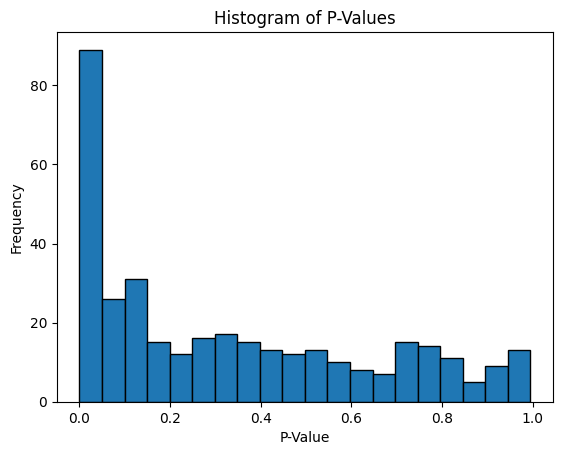

In [75]:
# histogram of p-values

plt.hist(interaction_model.pvalues, bins=20, edgecolor='black')
plt.title('Histogram of P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
"""The histogram showing a high number of p-values close to zero in the model with interaction terms implies that many predictors, both main effects and interactions, have statistical significance. This suggests that adding interaction terms effectively captures more relevant relationships between variables."""

In [ ]:
 Applying the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate
(FDR) with a q-value of 0.1. How many significant predictors are identified now,
including both main effects and interaction effects.



Alpha: 0.01957029918967793


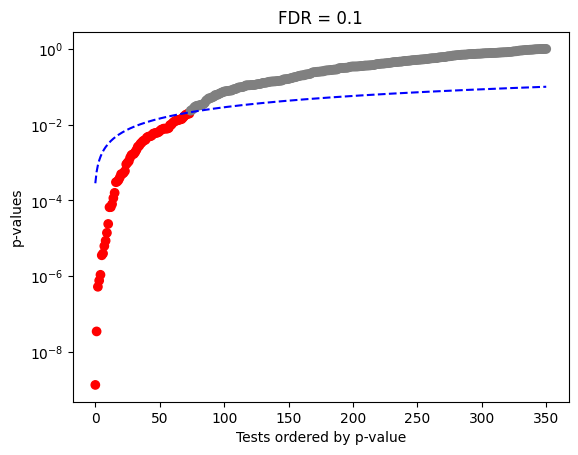

When q= 0.1 
The alpha is: 0.01957029918967793 
The estimated number of true discoveries for interaction: 74


In [76]:
# when q = 0.1
num_of_true_discoveries_intr, alpha1 = fdr(interaction_model.pvalues, 0.10, plotit=True)
print(f"When q= 0.1 \n"
      f"The alpha is: {alpha1} \n"
      f"The estimated number of true discoveries for interaction: {num_of_true_discoveries_intr}")

Alpha: 0.001686631337479228


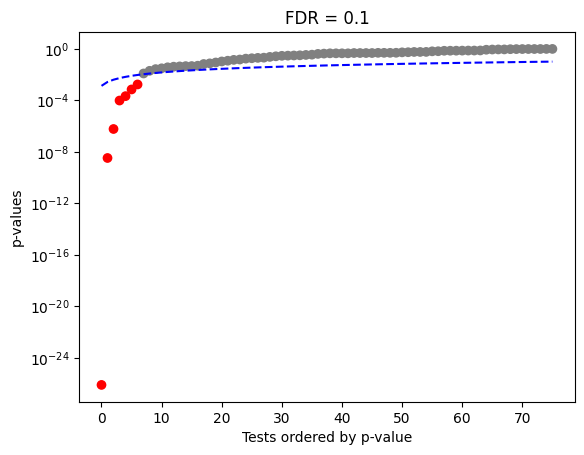

No. of true discoveries: 7


In [77]:
#without interaction
num_of_true_discoveries, alpha = fdr(model.pvalues, 0.1, plotit=True)
print(f"No. of true discoveries: {num_of_true_discoveries}")

In [ ]:
""" 1. The enhanced model with interaction terms identified a significantly higher number of true discoveries (75) compared to the base model (7), highlighting the effectiveness of interaction terms in revealing more complex relationships.

2. Alpha values are relatively consistent between the two models, with the new model showing a slightly higher threshold (0.0195) for determining statistical significance compared to the original model (0.0168).

3. The concentration of low p-values near zero in the histogram for the new model indicates a robust number of significant predictors, suggesting a better model fit due to the inclusion of interaction terms.

4. More predictors fall below the false discovery rate line in the new model's histogram, signifying a greater detection of significant relationships without substantially increasing the rate of false discoveries.

5. While the distribution of p-values in the new model suggests a strong fit, it also necessitates careful consideration of potential overfitting, which should be examined with additional validation techniques."""